In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [10]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [11]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [12]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    df_corr = df_corr.abs()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [13]:
def masking(mask_data):
    inputs, outputs_unmasked =mask_data
    mask = tf.math.logical_not(tf.math.equal(inputs, 0))
    mask = tf.cast(mask, dtype=outputs_unmasked.dtype) #convert it to the same data type as the outputs_unmasked
    outputs_masked= outputs_unmasked*mask
    return outputs_masked
    

In [14]:
os.getcwd()

'/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data'

In [15]:
# load data
data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/BIG5/data.csv')

col_name = list(data_read.columns)
data = data_read.iloc[:,col_name.index('E1'):col_name.index('O10')+1]
col_names = list(data.columns)
exp_data = data.values
zeroindex=(exp_data==0)
scaler = StandardScaler()
scaled_exp_data_df=data.copy()
scaled_exp_data_df=pd.DataFrame(scaler.fit_transform(scaled_exp_data_df), columns=data.columns)
#scaled_exp_data_df.info()
df_E=data.iloc[:,col_names.index('E1'):col_names.index('E10')+1]
alphaE=cronbach_alpha(df_E)
df_N=data.iloc[:,col_names.index('N1'):col_names.index('N10')+1]
alphaN=cronbach_alpha(df_N)
df_A=data.iloc[:,col_names.index('A1'):col_names.index('A10')+1]
alphaA=cronbach_alpha(df_A)
df_C=data.iloc[:,col_names.index('C1'):col_names.index('C10')+1]
alphaC=cronbach_alpha(df_C)
df_O=data.iloc[:,col_names.index('O1'):col_names.index('O10')+1]
alphaO=cronbach_alpha(df_O)
print(alphaE,alphaN, alphaA, alphaC, alphaO)
mean_E=df_E.mean(axis=None).mean()
std_E=df_E.std(axis=None).mean()
mean_N=df_N.mean(axis=None).mean()
std_N=df_N.std(axis=None).mean()
mean_A=df_A.mean(axis=None).mean()
std_A=df_A.std(axis=None).mean()
mean_C=df_C.mean(axis=None).mean()
std_C=df_C.std(axis=None).mean()
mean_O=df_O.mean(axis=None).mean()
std_O=df_O.std(axis=None).mean()
print(mean_E,mean_N, mean_A, mean_C, mean_O)
print(std_E,std_N,std_A,std_C,std_O)

0.8925028860332836 0.8676181908621856 0.8374318823930123 0.8115905717403081 0.7954163136458966
3.0765657487702214 3.0951924539783966 3.20477204726406 3.1547492266342103 3.3134793853643694
1.2928915961791714 1.2700498551114758 1.128777598915431 1.190656030164011 1.0525365443394383


In [16]:
df_corr = df_E.corr()
df_corr_abs=df_corr.abs()
#print(df_corr_abs)   

In [17]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_exp_data_df)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(scaled_exp_data_df)
print(kmo_model)


376900.40769436065 0.0
0.9098091720204473


/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [18]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(scaled_exp_data_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

FactorAnalyzer(rotation=None, rotation_kwargs={})

[8.04739087 4.61635215 3.74835278 3.5534873  2.76351158 1.58107551
 1.33061928 1.0536321  0.96636091 0.92618596 0.89681595 0.863636
 0.84686965 0.80468571 0.78706276 0.73381462 0.72728285 0.71979486
 0.68079937 0.66187492 0.65687516 0.63534022 0.61063383 0.589986
 0.58340323 0.56586203 0.55253249 0.53529905 0.52457406 0.51073325
 0.50291749 0.48971438 0.4872163  0.48273587 0.44980798 0.44781115
 0.43507542 0.42185998 0.41620527 0.40379847 0.39765851 0.37962448
 0.37303034 0.36358606 0.34772164 0.34375232 0.3252576  0.32341044
 0.31183169 0.22214019]
50


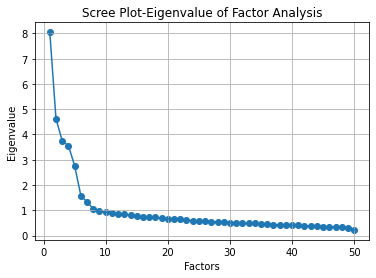

In [19]:
#GET EIGENVALUES
ev=fa.get_eigenvalues()

evarr = np.asarray(ev)
print(evarr[0])

print(len(evarr[0]))
# SCREEPLOT (need pyplot)
x=range(1,51,1)
plt.scatter(x,evarr[0])
plt.plot(x,ev[0])
plt.title('Scree Plot-Eigenvalue of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('ScreePlotFactorAnalysis.jpeg')
plt.show()

In [20]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="varimax", method='minres', use_smc=True)
fa.fit(scaled_exp_data_df)

#FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
#               method='minres', n_factors=4, rotation='varimax',
 #              rotation_kwargs={}, use_smc=True)

#fa.loadings_
fa.get_communalities()

array([0.45792781, 0.47655609, 0.574223  , 0.51985223, 0.59569448,
       0.40282681, 0.57322217, 0.32521076, 0.39756506, 0.45272984,
       0.4927389 , 0.26416912, 0.42630656, 0.13600463, 0.31935924,
       0.57196964, 0.52209978, 0.57302112, 0.53627259, 0.46888996,
       0.19765662, 0.41310733, 0.27443015, 0.61924604, 0.45107899,
       0.37386156, 0.50225258, 0.36359485, 0.5145036 , 0.30735046,
       0.38545282, 0.30499691, 0.24127463, 0.44673782, 0.41441796,
       0.37202866, 0.29714946, 0.30248763, 0.4047131 , 0.28098438,
       0.35832466, 0.35535989, 0.29904059, 0.25730638, 0.41653373,
       0.2649668 , 0.30159759, 0.3252415 , 0.1951985 , 0.48077802])

In [21]:
#fa.get_eigenvalues()
favar=fa.get_factor_variance()
print(favar)

#Get the transformed factor values
tf=fa.transform(scaled_exp_data_df)
print(tf)
#Get the reconstructed score by multiply the factor loadings and the factor values
reconstruction=np.dot(tf,fa.loadings_.transpose())
reconstruction.shape


(array([4.98625909, 4.61063454, 3.7664344 , 3.27188219, 3.17310275]), array([0.09972518, 0.09221269, 0.07532869, 0.06543764, 0.06346206]), array([0.09972518, 0.19193787, 0.26726656, 0.3327042 , 0.39616626]))
[[ 1.04765292 -1.87324149  0.5814569   1.30916469  0.40526184]
 [-0.7985163  -0.18777811 -0.14785607  0.93408578 -1.86698226]
 [ 0.63175243  2.35495555  0.13010995  2.11292655  0.74034898]
 ...
 [-0.285236    1.81131105 -1.41471231 -0.90930053 -0.01419889]
 [-0.93542083  1.02767821  0.02279128  1.28060819  0.60935331]
 [-0.77603793  0.65935935 -0.58444618  0.46691354  1.53128958]]


(19719, 50)

In [22]:
#Find the correlations between the input and the reconstructed values
corr_arr=[]
for i in range(0,50,1):
  corrnum=np.corrcoef(reconstruction[i,:],scaled_exp_data_df.iloc[i,:])
  corr_arr.append(corrnum[0,1])
  print(corrnum[0,1])
  
 

0.9113307730275219
0.7459070966272899
0.6021601295709172
0.6875533901759896
0.3853678492009451
0.5352737794467838
0.7973242486846788
0.8244467316782726
0.7860014563907864
0.8514842520584442
0.741786460788264
0.4535287127913531
0.5897398853781637
0.7285127246295077
0.6018231231625213
0.8924590504409258
0.8350473441240911
0.6897160192518145
0.6391552766956368
0.21975417738273006
0.47059236847721353
0.7150075565595614
0.6620290499407483
0.556866498336701
0.5427760013290533
0.32182150238224877
0.6414419784177455
0.574659280911877
0.626948068191728
0.5169142849936375
0.5309917138410176
0.49114762478148677
0.7734278342964173
0.8001357256749672
0.8231169412626347
0.6624624980338297
0.4653891200750803
0.5500354228952886
0.7851960562005011
0.6146945000739944
0.777082806378277
0.5330457398251077
0.6068027720396212
0.765307043911245
0.6748827532387853
0.6864716745990146
0.8414064044101434
0.767442022169279
0.873174556587139
0.6271887744302526


In [55]:
import statistics as stat
meancorr=sum(corr_arr)/len(corr_arr)
print(meancorr)
stdcorr=stat.stdev(corr_arr)
print(stdcorr)

0.6938785653009022
0.1392953862978604


In [50]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
corr_np=np.array(corr_arr)
savetxt('corrFA.csv', corr_np, delimiter=',')

In [23]:

# load numpy array from csv file
from numpy import loadtxt
# load array
corr_np2 = loadtxt('corrFA.csv', delimiter=',')
# print the array
print(corr_np2)

[0.72368101 0.6319779  0.73197656 0.80664113 0.7829975  0.85112632
 0.77671401 0.6975712  0.89869189 0.83360616 0.66096886 0.82281831
 0.55892686 0.38581396 0.68306818 0.66006289 0.85112632 0.60743565
 0.63061341 0.56551645 0.83492746 0.66547621 0.57898362 0.68858303
 0.89890894 0.46296063 0.49959706 0.62060588 0.67241449 0.77040744
 0.55999874 0.65006284 0.57894132 0.39561206 0.87656194 0.67710188
 0.44442    0.8697989  0.85303766 0.85870004 0.67750357 0.73437898
 0.89860968 0.65003272 0.77177851 0.73289844 0.64033217 0.72478302
 0.75673614 0.95215365]


MSE is: 0.5555449275898456


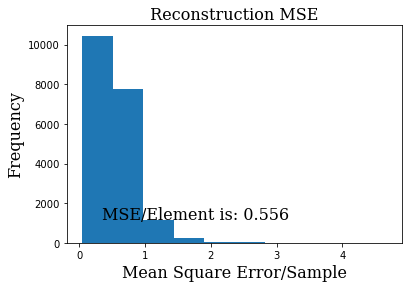

In [28]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# reconstruction performance

#recon = vae.predict(scaled_X_test)
recon_loss_1 = ((scaled_exp_data_df.values - reconstruction) ** 2).mean(axis=1)
plt.hist(recon_loss_1)
plt.title(' Reconstruction MSE ', fontdict=font)
recon_loss = ((scaled_exp_data_df.values - reconstruction) ** 2).mean(axis=None)
format_float = "{:.3f}".format(recon_loss)
print_text='MSE/Element is: '+str(format_float)
xpos=0.4
ytop=1200
ystep=200
plt.text(xpos-0.05, ytop, print_text, fontdict=font)
#plt.text(xpos, ytop-ystep, '3 Factors', fontdict=font)
#plt.text(xpos, ytop-ystep*2,  ' Middle Layer Nodes', fontdict=font)
plt.xlabel('Mean Square Error/Sample', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
print('MSE is:', recon_loss)

plt.show()
#plt.savefig('Big3LinearMSEHist1.png')

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0.73 0.66 0.62 0.59 0.57 0.55 0.53 0.52 0.51 0.5  0.5  0.49 0.48 0.48]


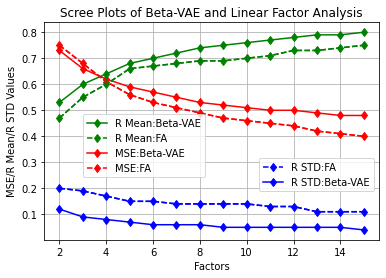

In [27]:
VAE = [[ 0.73, 0.53,  0.12],
       [ 0.66, 0.60,  0.09],
       [ 0.62, 0.64,  0.08],
       [ 0.59, 0.68,  0.07],    
       [ 0.57, 0.70,  0.06],
       [ 0.55, 0.72,  0.06],
       [ 0.53, 0.74,  0.06],
       [ 0.52, 0.75,  0.05],
       [ 0.51, 0.76,  0.05],
       [ 0.50, 0.77,  0.05],
       [ 0.50, 0.78,  0.05],
       [ 0.49, 0.79,  0.05],
       [ 0.48, 0.79,  0.05],
       [ 0.48, 0.80,  0.04]]
PCA = [[ 0.75, 0.47,  0.20],
       [ 0.68, 0.55,  0.19],
       [ 0.61, 0.60,  0.17],
       [ 0.56, 0.66,  0.15],    
       [ 0.53, 0.67,  0.15],
       [ 0.51, 0.68,  0.14],
       [ 0.49, 0.69,  0.14],
       [ 0.47, 0.69,  0.14],
       [ 0.46, 0.70,  0.14],
       [ 0.45, 0.71,  0.13],
       [ 0.44, 0.73,  0.13],
       [ 0.42, 0.73,  0.11],
       [ 0.41, 0.74,  0.11],
       [ 0.40, 0.75,  0.11]]


columns = ('MSE', 'R', 'Std R')
rows = ['%d nodes' % x for x in range(2,15)]
x = range(2,16)
xnp=np.array(x)
print(xnp)
vae=np.array(VAE)
pca=np.array(PCA)
print(vae[:,0])



vmse,=plt.plot(xnp,vae[:,0], 'r-d',label='MSE:Beta-VAE')
fmse,=plt.plot(xnp,pca[:,0], 'r--d',label='MSE:FA')

vr,=plt.plot(xnp,vae[:,1],'g-d',label='R Mean:Beta-VAE')
fr,=plt.plot(xnp,pca[:,1],'g--d',label='R Mean:FA')

vrstd,=plt.plot(xnp,vae[:,2],'b-d',label='R STD:Beta-VAE')
frstd,=plt.plot(xnp,pca[:,2],'b--d',label='R STD:FA')

plt.plot(xnp, pca[:,0], 'r',xnp,pca[:,1],'g',xnp,pca[:,2],'b',linestyle='--''')

#l1 = plt.legend([(vmse, fmse)], ['VAE and FA MSE '], numpoints=1,[(vr, fr)], ['VAE and FA R '], numpoints=1)
first_legend=plt.legend(handles=[vr,fr,vmse,fmse], bbox_to_anchor=(0.1, 0.6))
plt.gca().add_artist(first_legend)
plt.legend(handles=[frstd,vrstd], bbox_to_anchor=(1, 0.2),loc='lower right')


plt.title('Scree Plots of Beta-VAE and Linear Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('MSE/R Mean/R STD Values')
plt.grid()
plt.savefig('ScreePlotMSE-R-STD.jpeg')